In [22]:
import os, shutil
from os.path import join as pjoin
os.getcwd()

'c:\\Users\\snigd\\OneDrive\\Desktop\\Programming\\ML\\MachineLearningPractice\\books\\DeepLearningWithKeras\\CNN'

In [39]:
# DOWNLOAD -> https://www.kaggle.com/c/dogs-vs-cats/data
# full dataset (25k images)
original_dataset_dir = ".\data\dogs-vs-cats\\train"
# small dataset (2k training, 1k validation, 1k test)
base_dir = ".\data\small-dogs-vs-cats"

In [40]:
dir_train = pjoin(base_dir, "train")
dir_test = pjoin(base_dir, "test")
dir_validation = pjoin(base_dir, "validation")

dir_train_cats = pjoin(dir_train, "cats")
dir_test_cats = pjoin(dir_test, "cats")
dir_validation_cats = pjoin(dir_validation, "cats")

dir_train_dogs = pjoin(dir_train, "dogs")
dir_test_dogs = pjoin(dir_test, "dogs")
dir_validation_dogs = pjoin(dir_validation, "dogs")

In [41]:
for dir in [ base_dir, dir_train,dir_test,dir_validation,dir_train_cats,dir_test_cats,dir_validation_cats,dir_train_dogs,dir_test_dogs,dir_validation_dogs ]:
    os.mkdir(dir)

In [46]:
def copy_files(dest_dir: str, prefix: str, start: int, end: int):
    filenames = [f"{prefix}.{i}.jpg" for i in range(start, end)]
    for filename in filenames:
        src = pjoin(original_dataset_dir, filename)
        dest = pjoin(dest_dir, filename)
        print(src, dest)
        shutil.copyfile(src, dest)


In [48]:
copy_files(dir_train_cats, "cat", 0, 1000)
copy_files(dir_validation_cats, "cat", 1000, 1500)
copy_files(dir_test_cats, "cat", 1500, 2000)

copy_files(dir_train_dogs, "dog", 0, 1000)
copy_files(dir_validation_dogs, "dog", 1000, 1500)
copy_files(dir_test_dogs, "dog", 1500, 2000)

\test\dogs\dog.1772.jpg
.\data\dogs-vs-cats\train\dog.1773.jpg .\data\small-dogs-vs-cats\test\dogs\dog.1773.jpg
.\data\dogs-vs-cats\train\dog.1774.jpg .\data\small-dogs-vs-cats\test\dogs\dog.1774.jpg
.\data\dogs-vs-cats\train\dog.1775.jpg .\data\small-dogs-vs-cats\test\dogs\dog.1775.jpg
.\data\dogs-vs-cats\train\dog.1776.jpg .\data\small-dogs-vs-cats\test\dogs\dog.1776.jpg
.\data\dogs-vs-cats\train\dog.1777.jpg .\data\small-dogs-vs-cats\test\dogs\dog.1777.jpg
.\data\dogs-vs-cats\train\dog.1778.jpg .\data\small-dogs-vs-cats\test\dogs\dog.1778.jpg
.\data\dogs-vs-cats\train\dog.1779.jpg .\data\small-dogs-vs-cats\test\dogs\dog.1779.jpg
.\data\dogs-vs-cats\train\dog.1780.jpg .\data\small-dogs-vs-cats\test\dogs\dog.1780.jpg
.\data\dogs-vs-cats\train\dog.1781.jpg .\data\small-dogs-vs-cats\test\dogs\dog.1781.jpg
.\data\dogs-vs-cats\train\dog.1782.jpg .\data\small-dogs-vs-cats\test\dogs\dog.1782.jpg
.\data\dogs-vs-cats\train\dog.1783.jpg .\data\small-dogs-vs-cats\test\dogs\dog.1783.jpg
.\data\d

In [50]:
from tensorflow.keras import layers, models 

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [51]:
from tensorflow.keras import optimizers

model.compile(
    loss="binary_crossentropy",
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc']
)

We need to process the JPEG files to create RGB standardized tensors. 

In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(rescale=1.0/255)
datagen_test  = ImageDataGenerator(rescale=1.0/255)

generator_train = datagen_train.flow_from_directory(
    dir_train,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

generator_validation = datagen_test.flow_from_directory(
    dir_validation,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [83]:
history = model.fit_generator(
    generator_train,
    steps_per_epoch=100,
    epochs=30,
    validation_data=generator_validation,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 6s 61ms/step - loss: 0.6732 - acc: 0.5685 - val_loss: 0.6756 - val_acc: 0.5390
Epoch 2/30
100/100 [==============================] - 6s 62ms/step - loss: 0.6450 - acc: 0.6260 - val_loss: 0.6530 - val_acc: 0.5790
Epoch 3/30
100/100 [==============================] - 6s 64ms/step - loss: 0.6129 - acc: 0.6620 - val_loss: 0.6033 - val_acc: 0.6590
Epoch 4/30
100/100 [==============================] - 6s 62ms/step - loss: 0.5816 - acc: 0.6875 - val_loss: 0.5798 - val_acc: 0.7040
Epoch 5/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5553 - acc: 0.7195 - val_loss: 0.5690 - val_acc: 0.6980
Epoch 6/30
100/100 [==============================] - 6s 62ms/step - loss: 0.5397 - acc: 0.7320 - val_loss: 0.5854 - val_acc: 0.6960
Epoch 7/30
100/100 [==============================] - 6s 62ms/step - loss: 0.5190 - acc: 0.7475 - val_loss: 0.5567 - val_acc: 0.6950
Epoch 8/30
100/100 [==============================] - 6s 61ms/step - 

In [54]:
model.save('cats_and_dogs_small_1_h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: cats_and_dogs_small_1_h5\assets


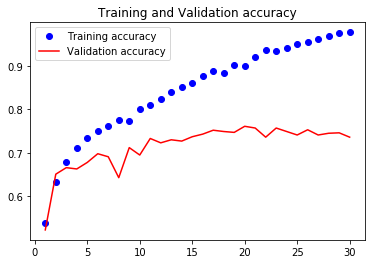

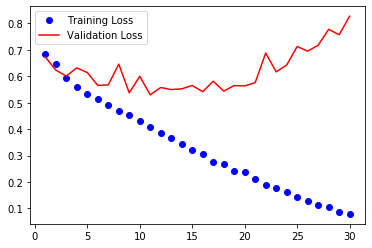

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'r', label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.legend()

plt.show()




## CLASSIC OVERFIT
We need to use data augmentation to generate new data from existing data. 
Data augmentation does some transformations to the existing data which can be thought of as seeing the data through a different perspective. 


In [58]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

#### Displaying augmented data images.

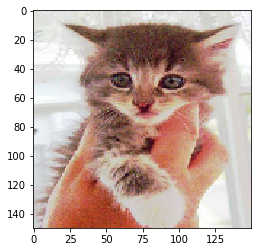

In [66]:
# ORIGINAL IMAGE
from tensorflow.keras.preprocessing import image
filenames = [ pjoin(dir_train_cats, filename) for filename in os.listdir(dir_train_cats) ]
img_path = filenames[3]

img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)


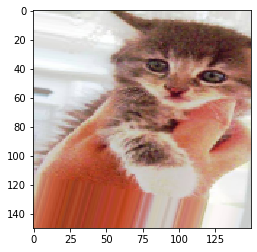

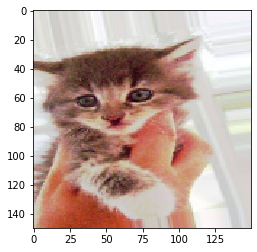

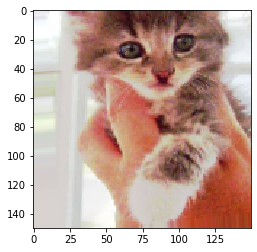

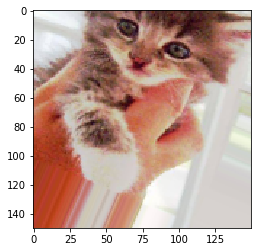

In [73]:
# AUGMENTING IMAGES USING DATAGEN

x = image.img_to_array(img)
# Generally all algorithms take an array of input (not one piece of input)
# This is a 1 element array containing one input sample 
x = x.reshape(1, *x.shape) 

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break



In [75]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss="binary_crossentropy",
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc']
)

In [84]:
datagen_train = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen_test = ImageDataGenerator(
    rescale=1.0/255
)

generator_train = datagen_train.flow_from_directory(
    dir_train,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

generator_validation = datagen_test.flow_from_directory(
    dir_validation,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [79]:
model.fit_generator(
    generator_train,
    steps_per_epoch=100,
    epochs=100,
    validation_data=generator_validation,
    validation_steps=50
)

Epoch 1/100
 63/100 [=================>............] - 14s 215ms/step - loss: 0.6865 - acc: 0.5435 - val_loss: 0.6747 - val_acc: 0.6030
